<a href="https://colab.research.google.com/github/zuzannasosnowska/ResponsibleAI-2/blob/main/AI_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Responsible AI Coursework No. 2 Code**

Firstly, we need to import few things that will be used later on

In [ ]:
!pip install saliency 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 KB 2.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import PIL.Image
from matplotlib import pylab as P
import saliency.core as saliency

%matplotlib inline

**Utility Methods**

In [ ]:
def ShowImage(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im)
  P.title(title)

def ShowGrayscaleImage(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')

  P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
  P.title(title)

def ShowHeatMap(im, title, ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im, cmap='inferno')
  P.title(title)

def LoadImage(file_path):
  im = PIL.Image.open(file_path)
  im = im.resize((224,224))
  im = np.asarray(im)
  return im

def PreprocessImage(im):
  im = tf.keras.applications.vgg16.preprocess_input(im)
  return im

**Loading Model no. 1**

As my first neural network I chose VGG16 model

In [ ]:
m = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model = tf.keras.models.Model([m.inputs], [m.output])

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
class_idx_str = 'class_idx_str'
def call_model_function(images, call_model_args=None, expected_keys=None):
    target_class_idx =  call_model_args[class_idx_str]
    images = tf.convert_to_tensor(images)
    with tf.GradientTape() as tape:
        if expected_keys==[saliency.base.INPUT_OUTPUT_GRADIENTS]:
            tape.watch(images)
            output_layer = model(images)
            output_layer = output_layer[:,target_class_idx]
            gradients = np.array(tape.gradient(output_layer, images))
            return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}
        else:
            conv_layer, output_layer = model(images)
            gradients = np.array(tape.gradient(output_layer, conv_layer))
            return {saliency.base.CONVOLUTION_LAYER_VALUES: conv_layer,
                    saliency.base.CONVOLUTION_OUTPUT_GRADIENTS: gradients}

**Loading Images and using VGG16 model to Predict Class**

**1st Image**

Prediction class: 895
Prediction accuracy: 0.16787022


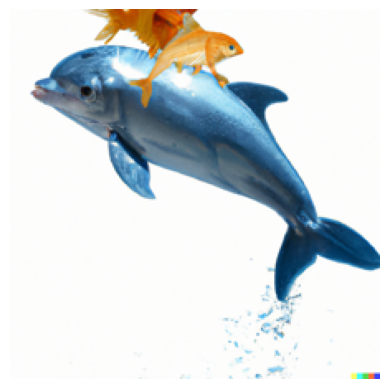

In [ ]:
im_orig = LoadImage('./goldfish.png')
im = PreprocessImage(im_orig)
ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg16_1 = np.argmax(predictions[0])
call_model_args2 = {class_idx_str: prediction_vgg16_1}
prediction_prob_vgg16_1 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg16_1))  
print("Prediction accuracy: " + str(prediction_prob_vgg16_1))



An expected predicition class for this image is 1 i.e., Goldfish. 

Although, it was predicted as class 895 so warplane/ military plane.

Moroever, from the predicition accuracy we can see the model only scored around 0.17 which indicates that it is not a certain preditction.

In order to better understand the results, I decided to also already create the saliency maps for the images. As it can be seen in this case they will be basing on VGG16 model. 

Hence code below outputs the saliency map for the image above.

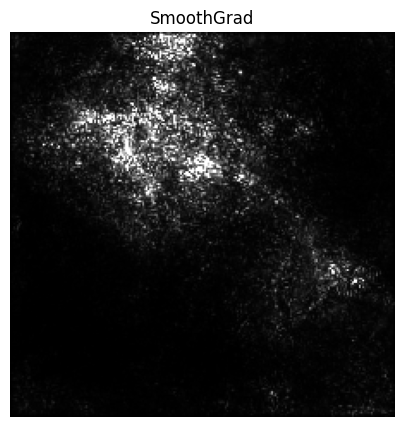

In [ ]:
#Creating Saliency Map 
gradient_saliency = saliency.GradientSaliency()
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args2)


smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ROWS = 1
COLS = 1
UPSCALE_FACTOR = 5
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 1))

In this case seems like saliency map does not really show well the goldfish so the feature that it was meant to focus the most on. 

**2nd Image**

Prediction class: 162
Prediction accuracy: 0.716589


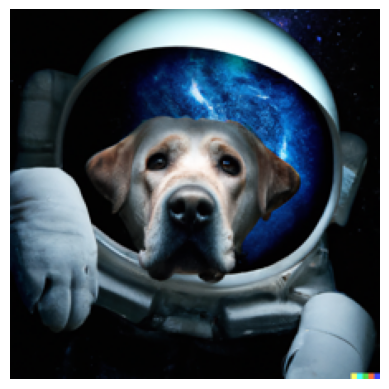

In [ ]:
im_orig = LoadImage('./labrador.png')
im = PreprocessImage(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg16_2 = np.argmax(predictions[0])
call_model_args3 = {class_idx_str: prediction_vgg16_2}
prediction_prob_vgg16_2 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg16_2))  
print("Prediction accuracy: " + str(prediction_prob_vgg16_2))

The expected predicition class for this image is 208 i.e., Labrador retriever.
Although, it was predicted as class 162 so Beagle which is also a dog but different breed.

The predicition accuracy is around 0.72 so the model was pretty confident with recognizing this one. 

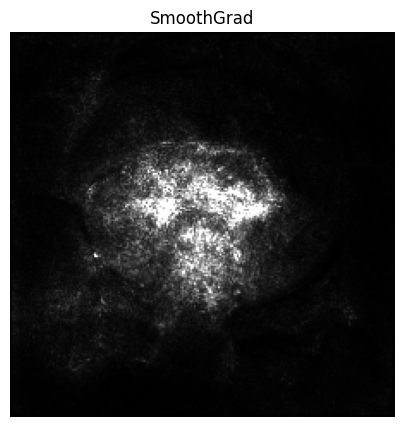

In [ ]:
#Saliency Map
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args3)


smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ROWS = 1
COLS = 1
UPSCALE_FACTOR = 5
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 1))

The saliency map shows that the focus was on a correct feature i.e., dog's body.

**3rd Image**

The image below shows my approach to testing how this and other used neural networks will handle class not seen by ImageNet. Hence the choice of avocado. 

Prediction class: 943
Prediction accuracy: 0.3549297


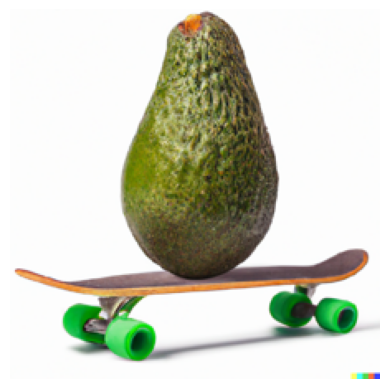

In [ ]:
im_orig = LoadImage('./avocado.png')
im = PreprocessImage(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg16_3 = np.argmax(predictions[0])
call_model_args4 = {class_idx_str: prediction_vgg16_3}
prediction_prob_vgg16_3 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg16_3))  
print("Prediction accuracy: " + str(prediction_prob_vgg16_3))

In this case the model predicted avocado as class 943 which represents cucumber/cuke. Both avocado and cucumber are vegetables so in my opinion this was realtively good prediction since the predicted class also comes from the same family (vegetables)as the actual class. 

However, the prediction accuracy for this one is low as it is only 0.36. This makes sense though as avocado is not in ImageNet.

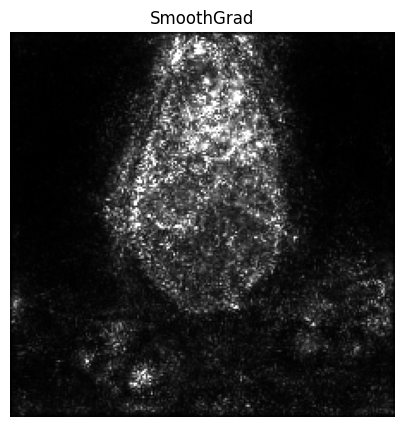

In [ ]:
#Saliency Map
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args4)


smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ROWS = 1
COLS = 1
UPSCALE_FACTOR = 5
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 1))

**4th Image**

Prediction class: 872
Prediction accuracy: 0.13582738


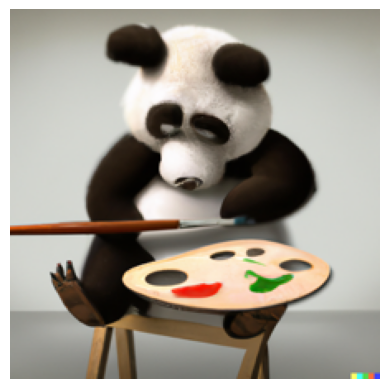

In [ ]:
im_orig = LoadImage('./panda2.png')
im = PreprocessImage(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg16_4 = np.argmax(predictions[0])
call_model_args5 = {class_idx_str: prediction_vgg16_4}
prediction_prob_vgg16_4 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg16_4))  
print("Prediction accuracy: " + str(prediction_prob_vgg16_4))

For this image the expected class is 388 so panda but as it can be seen it was predicted as tripod. This predicition is way far from the expected class.

The value for the predicition accuracy also confirms that as it is only 0.14 which indicates that model was not certain about it.

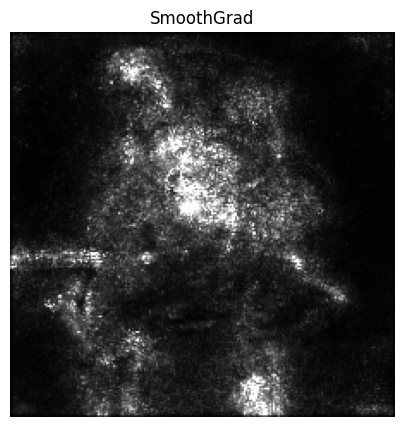

In [ ]:
#Saliency Map
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args5)


smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ROWS = 1
COLS = 1
UPSCALE_FACTOR = 5
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 1))

The saliency map shows that the focus was on mostly panda so where I aimed it to be. Some panda features can be seen like ears but overall this saliency map is not helpful.

**5th Image**

Prediction class: 850
Prediction accuracy: 0.70983976


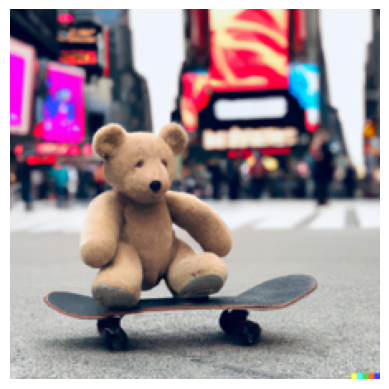

In [ ]:
im_orig = LoadImage('./teddyBear.png')
im = PreprocessImage(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg16_5 = np.argmax(predictions[0])
call_model_args6 = {class_idx_str: prediction_vgg16_5}
prediction_prob_vgg16_5 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg16_5))  
print("Prediction accuracy: " + str(prediction_prob_vgg16_5))

Prediction was correct and also the model was certain about it as it scored 0.71.

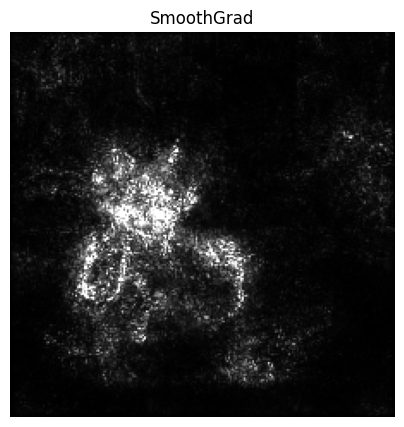

In [ ]:
#Saliency Map
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args6)


smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ROWS = 1
COLS = 1
UPSCALE_FACTOR = 5
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 1))

**Loading Model no. 2**

As my second neural network I chose VGG19 model

In [ ]:
def PreprocessImage2(im):
  im = tf.keras.applications.vgg19.preprocess_input(im)
  return im

In [ ]:
m = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=True)
model = tf.keras.models.Model([m.inputs], [m.output])

574710816/574710816 [==============================] - 4s 0us/step


**1st Image**

Prediction class: 1
Prediction accuracy: 0.38986376


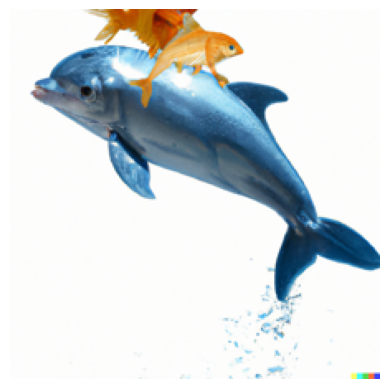

In [ ]:
im_orig = LoadImage('./goldfish.png')
im = PreprocessImage2(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg19_1 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_vgg19_1}

prediction_prob_vgg19_1 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg19_1)) 
print("Prediction accuracy: " + str(prediction_prob_vgg19_1)) 

In this case the predicition was correct however the predicition accuracy is low (0.39) which indicates the neural network was not certain.

**2nd Image**

Prediction class: 162
Prediction accuracy: 0.27583015


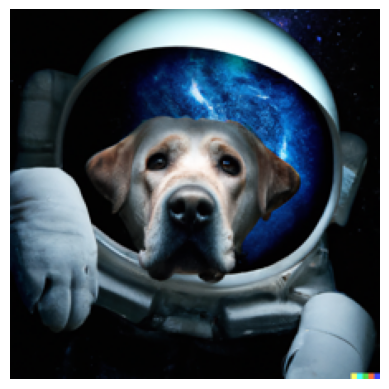

In [ ]:
im_orig = LoadImage('./labrador.png')
im = PreprocessImage2(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg19_2 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_vgg19_2}

prediction_prob_vgg19_2 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg19_2)) 
print("Prediction accuracy: " + str(prediction_prob_vgg19_2)) 

Once again this image was predicted as class 162. Altough this time the model was not as sure as the previous and hence 0.28 for predicition score.

**3rd Image**

Prediction class: 952
Prediction accuracy: 0.16499615


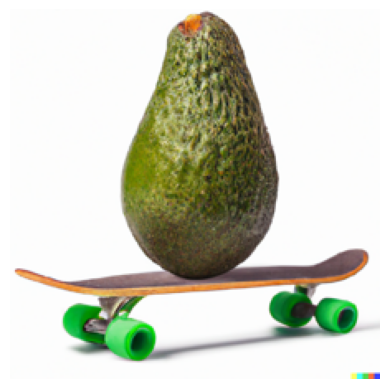

In [ ]:
im_orig = LoadImage('./avocado.png')
im = PreprocessImage2(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg19_3 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_vgg19_3}

prediction_prob_vgg19_3 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg19_3)) 
print("Prediction accuracy: " + str(prediction_prob_vgg19_3))  

VGG19 same as VGG16 gave realatively understandable prediction class. It is 952 which represents a fig.

The model once again was not sure about this prediction as it only gave 0.16. This again is due to avocado not existing as class in ImageNet.

**4th Image**

Prediction class: 767
Prediction accuracy: 0.07432506


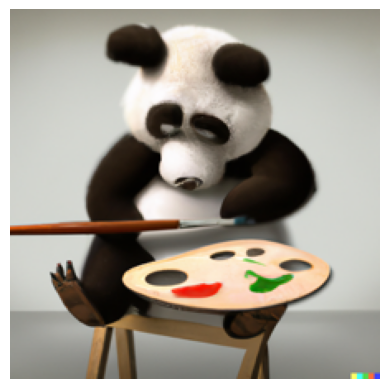

In [ ]:
im_orig = LoadImage('./panda2.png')
im = PreprocessImage2(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg19_4 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_vgg19_4}

prediction_prob_vgg19_4 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg19_4)) 
print("Prediction accuracy: " + str(prediction_prob_vgg19_4)) 

The predicted class is 767 which is rubber eraser/ rubber/pencil eraser. This prediction class is way far from what was meant to be predicted i.e., panda. Moroever, the prediction accuracy is 0.07 so very low.

**5th Image**

Prediction class: 850
Prediction accuracy: 0.87714285


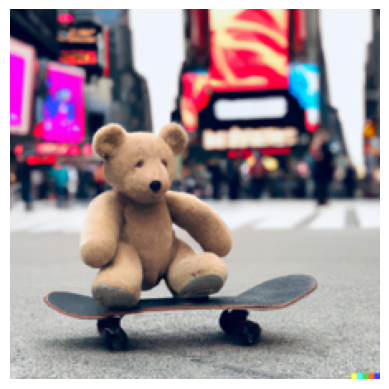

In [ ]:
im_orig = LoadImage('./teddyBear.png')
im = PreprocessImage2(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg19_5 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_vgg19_5}

prediction_prob_vgg19_5 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg19_5)) 
print("Prediction accuracy: " + str(prediction_prob_vgg19_5)) 

Once again the prediction for this class was correct and the model was certain about it. Hence its high prediction accuracy.




**Loading Model no. 3**

As my third neural network I chose ResNet50 model

In [ ]:
def ShowImage3(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im)
  P.title(title)

def ShowGrayscaleImage3(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')

  P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
  P.title(title)

def ShowHeatMap3(im, title, ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im, cmap='inferno')
  P.title(title)

def LoadImage3(file_path):
  im = PIL.Image.open(file_path)
  im = im.resize((224,224))
  im = np.asarray(im)
  return im

def PreprocessImage3(im):
  im = tf.keras.applications.resnet.preprocess_input(im)
  return im

In [ ]:
m = tf.keras.applications.resnet.ResNet50(weights='imagenet', include_top=True)
model = tf.keras.models.Model([m.inputs], [m.output])

102967424/102967424 [==============================] - 1s 0us/step


**1st Image**

Prediction class: 1
Prediction accuracy: 0.34882146


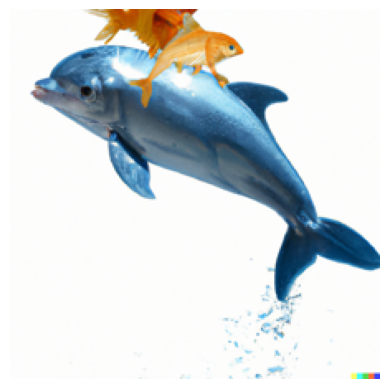

In [ ]:
im_orig = LoadImage('./goldfish.png')
im = PreprocessImage3(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet50_1 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet50_1}

prediction_prob_resNet50_1 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet50_1)) 
print("Prediction accuracy: " + str(prediction_prob_resNet50_1))   

The class was predicted correctly once again. This time the model was less certain about it when compared with the previous one which also predicted class correctly. 

**2nd Image**

Prediction class: 162
Prediction accuracy: 0.34040466


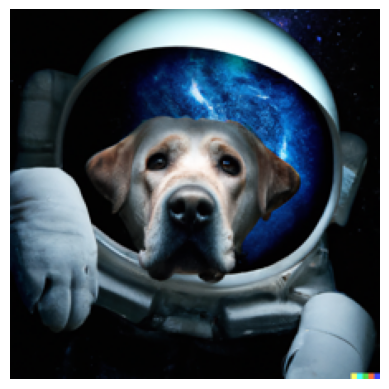

In [ ]:
im_orig = LoadImage('./labrador.png')
im = PreprocessImage3(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet50_2 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet50_2}

prediction_prob_resNet50_2 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet50_2)) 
print("Prediction accuracy: " + str(prediction_prob_resNet50_2))  

Here once again again this class was predicted as Beagle and not Labrador Retriever. The prediction accuracy is higher than for the previous model but still the model was not as certain about prediction as it was with 1st neural network.

**3rd Image**

Prediction class: 522
Prediction accuracy: 0.99519736


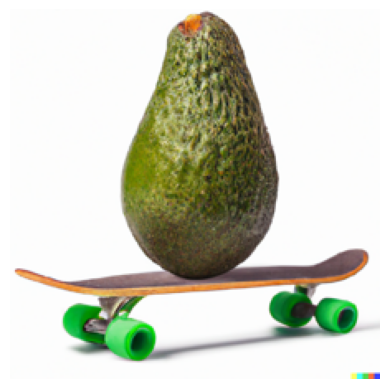

In [ ]:
im_orig = LoadImage('./avocado.png')
im = PreprocessImage3(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet50_3 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet50_3}

prediction_prob_resNet50_3 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet50_3)) 
print("Prediction accuracy: " + str(prediction_prob_resNet50_3))  

The 3rd image was predicted as a croquet ball which is far from what it actually is, avocado. On the other hand, the model was really certain about it as it scored 0.995 for prediction accuracy.

**4th Image**

Prediction class: 910
Prediction accuracy: 0.19828188


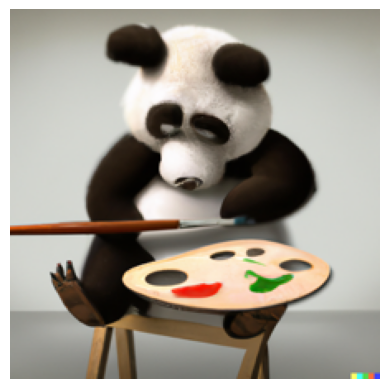

In [ ]:
im_orig = LoadImage('./panda2.png')
im = PreprocessImage3(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet50_4 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet50_4}

prediction_prob_resNet50_4 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet50_4)) 
print("Prediction accuracy: " + str(prediction_prob_resNet50_4))  

Once again the expected class (panda) was not recognized. This time model predicted it as 910 which is a wooden spoon. 

The prediction got a low value 0.2 which shows that the model was not sure about it.

**5th Image**

Prediction class: 850
Prediction accuracy: 0.88422585


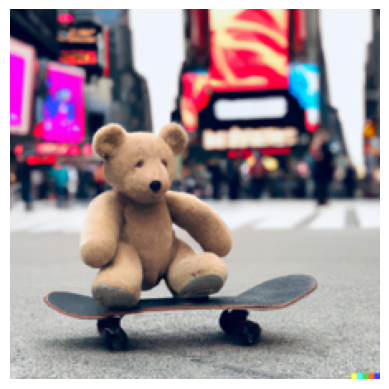

In [ ]:
im_orig = LoadImage('./teddyBear.png')
im = PreprocessImage3(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet50_5 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet50_5}

prediction_prob_resNet50_5 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet50_5)) 
print("Prediction accuracy: " + str(prediction_prob_resNet50_5))  

Model predicted class properly, i.e., 850. Additionaly, the prediction was high (0.88) which once agai shows that the model was certain about it.

**Loading Model no. 4**

As my fourth neural network I chose ResNet101 model

In [ ]:
def PreprocessImage4(im):
  im = tf.keras.applications.resnet.preprocess_input(im)
  return im
m = tf.keras.applications.resnet.ResNet101(weights='imagenet', include_top=True)
model = tf.keras.models.Model([m.inputs], [m.output])

179648224/179648224 [==============================] - 1s 0us/step


**1st Image**

Prediction class: 391
Prediction accuracy: 0.15581526


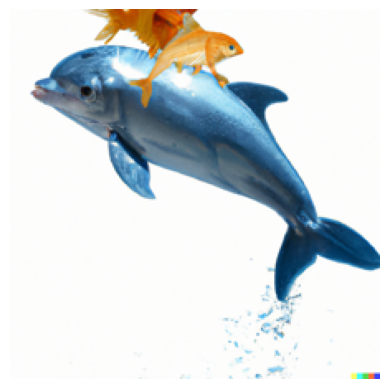

In [ ]:
im_orig = LoadImage('./goldfish.png')
im = PreprocessImage4(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet101_1 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet101_1}

prediction_prob_resNet101_1 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet101_1)) 
print("Prediction accuracy: " + str(prediction_prob_resNet101_1)) 

The prediction was not correct as the class was predicted as 391 instead of 1. Class 391 is coho/ cohoe/coho salmon/blue jack/silver salmon/Oncorhynchus kisutch which is relatively okay as at least the prediction could tell that it has to be some fish related class. 

The model though was not sure about it as only scored 0.16.

**2nd Image**

Prediction class: 518
Prediction accuracy: 0.5481175


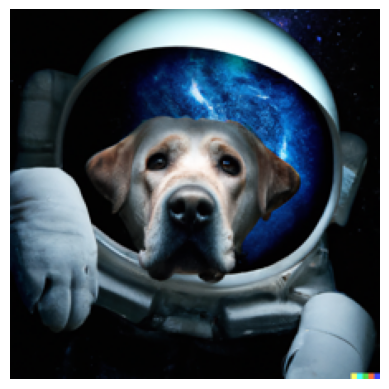

In [ ]:
im_orig = LoadImage('./labrador.png')
im = PreprocessImage4(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet101_2 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet101_2}

prediction_prob_resNet101_2 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet101_2)) 
print("Prediction accuracy: " + str(prediction_prob_resNet101_2)) 

ResNet101 is the first model so far that did not predict this class as Beagle so certain dog breed. The predicted class this time is 518 which represnts a crash helmet. Seems like then that the model focused more on fact that the dog is represnted as an astronaout and its clothes rather than on the dog.

ResNet101 was not so sure about the prediction as the prediction accuracy is 0.55

**4th Image**

Prediction class: 522
Prediction accuracy: 0.5872894


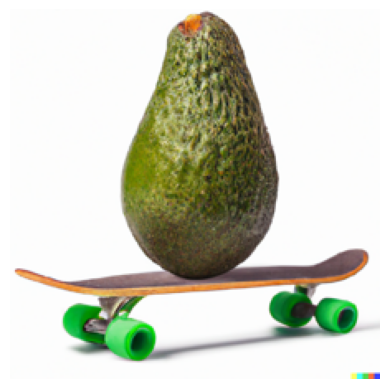

In [ ]:
im_orig = LoadImage('./avocado.png')
im = PreprocessImage4(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet101_3 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet101_3}

prediction_prob_resNet101_3 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet101_3)) 
print("Prediction accuracy: " + str(prediction_prob_resNet101_3)) 

Once again this image was predicted as class 522 so croquet ball. However, this time ResNet101 was less certain about when compared with other model that predicted the same.

**4th Image**

Prediction class: 767
Prediction accuracy: 0.1650974


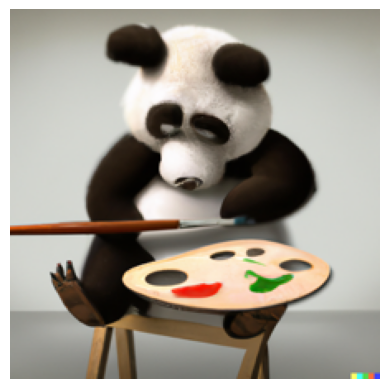

In [ ]:
im_orig = LoadImage('./panda2.png')
im = PreprocessImage4(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet101_4 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet101_4}

prediction_prob_resNet101_4 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet101_4)) 
print("Prediction accuracy: " + str(prediction_prob_resNet101_4)) 

For the second time the panda is being classed as 767 but the prediction probability shows that the model was uncertain about it. Hence the prediction accuracy only 0.17

**5th Image**

Prediction class: 850
Prediction accuracy: 0.9869528


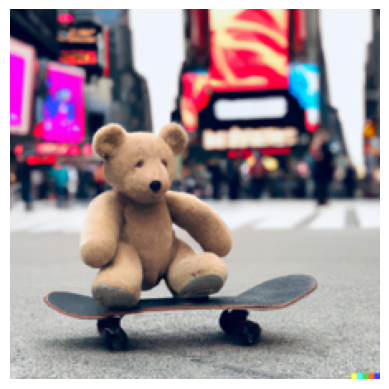

In [ ]:
im_orig = LoadImage('./teddyBear.png')
im = PreprocessImage4(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_resNet101_5 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_resNet101_5}

prediction_prob_resNet101_5 = np.max(predictions[0])

print("Prediction class: " + str(prediction_resNet101_5)) 
print("Prediction accuracy: " + str(prediction_prob_resNet101_5)) 

Once again the teddy bear class is being predicted properly. The ResNet101 was almost 100% sure about it which is reflected by its prediction accuracy (0.986)

**Loading Model no. 5**

As my fifth neural network I chose MobileNet model

In [ ]:
def PreprocessImage5(im):
  im = tf.keras.applications.mobilenet.preprocess_input(im)
  return im
m = tf.keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=True)
model = tf.keras.models.Model([m.inputs], [m.output])

17225924/17225924 [==============================] - 0s 0us/step


**1st Image**

Prediction class: 4
Prediction accuracy: 0.31193256


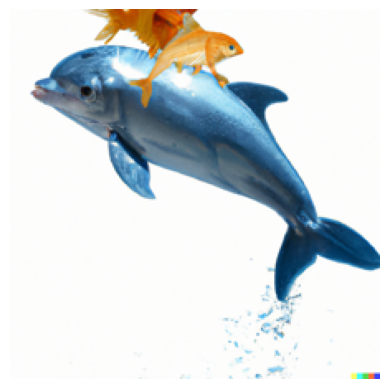

In [ ]:
im_orig = LoadImage('./goldfish.png')
im = PreprocessImage5(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_mobileNet_1 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_mobileNet_1}

prediction_prob_mobileNet_1 = np.max(predictions[0])

print("Prediction class: " + str(prediction_mobileNet_1)) 
print("Prediction accuracy: " + str(prediction_prob_mobileNet_1)) 

MobileNet predicted this class as 4 i.e., hammerhead/ hammerhead shark. However it was not certain about it and hence this low prediction accuracy. 

**2nd Image**

Prediction class: 208
Prediction accuracy: 0.33677912


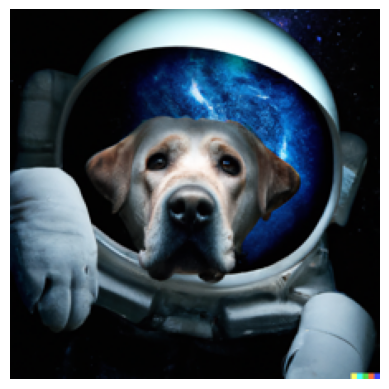

In [ ]:
im_orig = LoadImage('./labrador.png')
im = PreprocessImage5(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_mobileNet_2 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_mobileNet_2}

prediction_prob_mobileNet_2 = np.max(predictions[0])

print("Prediction class: " + str(prediction_mobileNet_2)) 
print("Prediction accuracy: " + str(prediction_prob_mobileNet_2)) 


MobileNet is the first neural network in this project that predicted the class properly. However it was not sure about it which is shown by 0.34 for prediction accuracy. 

**3rd Image**

Prediction class: 988
Prediction accuracy: 0.5931099


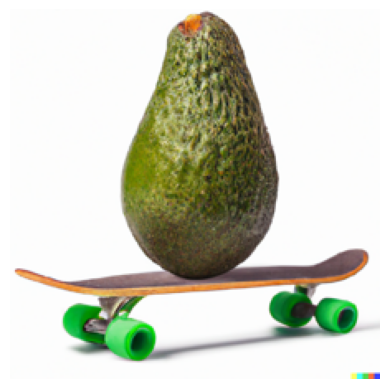

In [ ]:
im_orig = LoadImage('./avocado.png')
im = PreprocessImage5(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_mobileNet_3 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_mobileNet_3}

prediction_prob_mobileNet_3 = np.max(predictions[0])

print("Prediction class: " + str(prediction_mobileNet_3)) 
print("Prediction accuracy: " + str(prediction_prob_mobileNet_3)) 

Avocado this time was classed as acorn with relatively high certainity (0.6)

**4th Image**

Prediction class: 813
Prediction accuracy: 0.31176198


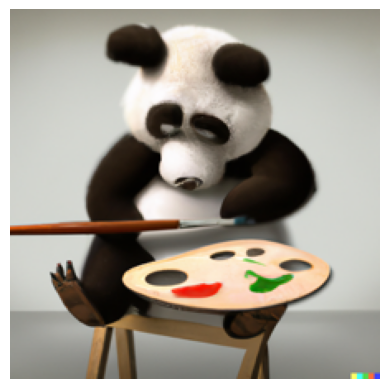

In [ ]:
im_orig = LoadImage('./panda2.png')
im = PreprocessImage5(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_mobileNet_4 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_mobileNet_4}

prediction_prob_mobileNet_4 = np.max(predictions[0])

print("Prediction class: " + str(prediction_mobileNet_4)) 
print("Prediction accuracy: " + str(prediction_prob_mobileNet_4)) 

Once again expected class (panda) was not recognized as MobileNet classified it as 813 which is spatula. 

The certainity of this prediction was low though as it is 0.31

**5th Image**

Prediction class: 850
Prediction accuracy: 0.9976413


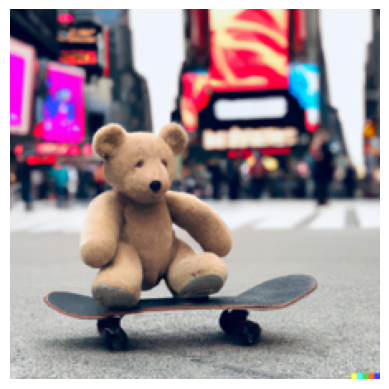

In [ ]:
im_orig = LoadImage('./teddyBear.png')
im = PreprocessImage5(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_mobileNet_5 = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_mobileNet_5}

prediction_prob_mobileNet_5 = np.max(predictions[0])

print("Prediction class: " + str(prediction_mobileNet_5)) 
print("Prediction accuracy: " + str(prediction_prob_mobileNet_5)) 

As it was other four different neural netowrk, this one as well predicted the class correctly. It was also really certain about it. 

# Summary of the Results

For better understatement of the results the summary below shows reults per image.

In [ ]:
# Defining a function to print a row in the table
def print_row(model_name, prediction_class, prediction_prob):
    print("{:<10} {:<20} {:<25}".format(model_name, prediction_class, prediction_prob))

#Code below gives a summary of results per image
print("Correct Class 1 - Goldfish")
print("{:<10} {:<20} {:<25}".format("Model", "Prediction Class", "Prediction Accuracy"))
print_row("VGG16", prediction_vgg16_1, prediction_prob_vgg16_1)
print_row("VGG19", prediction_vgg19_1, prediction_prob_vgg19_1)
print_row("ResNet50", prediction_resNet50_1, prediction_prob_resNet50_1)
print_row("ResNet101", prediction_resNet101_1, prediction_prob_resNet101_1)
print_row("MobileNet", prediction_mobileNet_1, prediction_prob_mobileNet_1)

print("Correct Class 208 - Labrador retriever")
print("{:<10} {:<20} {:<25}".format("Model", "Prediction Class", "Prediction Accuracy"))
print_row("VGG16", prediction_vgg16_2, prediction_prob_vgg16_2)
print_row("VGG19", prediction_vgg19_2, prediction_prob_vgg19_2)
print_row("ResNet50", prediction_resNet50_2, prediction_prob_resNet50_2)
print_row("ResNet101", prediction_resNet101_2, prediction_prob_resNet101_2)
print_row("MobileNet", prediction_mobileNet_2, prediction_prob_mobileNet_2)

print("Unseen image - Avocado")
print("{:<10} {:<20} {:<25}".format("Model", "Prediction Class", "Prediction Accuracy"))
print_row("VGG16", prediction_vgg16_3, prediction_prob_vgg16_3)
print_row("VGG19", prediction_vgg19_3, prediction_prob_vgg19_3)
print_row("ResNet50", prediction_resNet50_3, prediction_prob_resNet50_3)
print_row("ResNet101", prediction_resNet101_3, prediction_prob_resNet101_3)
print_row("MobileNet", prediction_mobileNet_3, prediction_prob_mobileNet_3)

print("Correct Class 388 - panda")
print("{:<10} {:<20} {:<25}".format("Model", "Prediction Class", "Prediction Accuracy"))
print_row("VGG16", prediction_vgg16_4, prediction_prob_vgg16_4)
print_row("VGG19", prediction_vgg19_4, prediction_prob_vgg19_4)
print_row("ResNet50", prediction_resNet50_4, prediction_prob_resNet50_4)
print_row("ResNet101", prediction_resNet101_4, prediction_prob_resNet101_4)
print_row("MobileNet", prediction_mobileNet_4, prediction_prob_mobileNet_4)

print("Correct Class 850 - teddy bear")
print("{:<10} {:<20} {:<25}".format("Model", "Prediction Class", "Prediction Accuracy"))
print_row("VGG16", prediction_vgg16_5, prediction_prob_vgg16_5)
print_row("VGG19", prediction_vgg19_5, prediction_prob_vgg19_5)
print_row("ResNet50", prediction_resNet50_5, prediction_prob_resNet50_5)
print_row("ResNet101", prediction_resNet101_5, prediction_prob_resNet101_5)
print_row("MobileNet", prediction_mobileNet_5, prediction_prob_mobileNet_5)

Correct Class 1 - Goldfish
Model      Prediction Class     Prediction Accuracy      
VGG16      895                  0.16787022352218628      
VGG19      1                    0.3898637592792511       
ResNet50   1                    0.3488214612007141       
ResNet101  391                  0.1558152586221695       
MobileNet  4                    0.3119325637817383       
Correct Class 208 - Labrador retriever
Model      Prediction Class     Prediction Accuracy      
VGG16      162                  0.7165889739990234       
VGG19      162                  0.27583014965057373      
ResNet50   162                  0.3404046595096588       
ResNet101  518                  0.5481175184249878       
MobileNet  208                  0.3367791175842285       
Unseen image - Avocado
Model      Prediction Class     Prediction Accuracy      
VGG16      943                  0.35492968559265137      
VGG19      952                  0.16499614715576172      
ResNet50   522                  0.9951973

# Building the Ensemble

For this project I decided to use majority voting while creating the ensemble.

In [ ]:
#goldfish
goldfishClassList  = [prediction_vgg16_1,prediction_vgg19_1,prediction_resNet50_1,prediction_resNet101_1,prediction_mobileNet_1]

#Labrador 
labradorClassList = [prediction_vgg16_2,prediction_vgg19_2,prediction_resNet50_2,prediction_resNet101_2,prediction_mobileNet_2]

#Avocado
avocadoClassList = [prediction_vgg16_3,prediction_vgg19_3,prediction_resNet50_3,prediction_resNet101_3,prediction_mobileNet_3]

#Panda
pandaClassList = [prediction_vgg16_4,prediction_vgg19_4,prediction_resNet50_4,prediction_resNet101_4,prediction_mobileNet_4]

#Teddy Bear
teddyClassList = [prediction_vgg16_5,prediction_vgg19_5,prediction_resNet50_5,prediction_resNet101_5,prediction_mobileNet_5]

In [ ]:
from collections import Counter
from prettytable import PrettyTable

classLists = [goldfishClassList, labradorClassList, avocadoClassList, pandaClassList, teddyClassList]

table = PrettyTable()
table.field_names = ["Class Image", "Most Common Class", "Count"]

for i, classList in enumerate(classLists):
    classCounter = Counter(classList)
    mostCommonClass, count = classCounter.most_common(1)[0]
    table.add_row([f"Image {i+1}", mostCommonClass, count])

print(table)


+-------------+-------------------+-------+
| Class Image | Most Common Class | Count |
+-------------+-------------------+-------+
|   Image 1   |         1         |   2   |
|   Image 2   |        162        |   3   |
|   Image 3   |        522        |   2   |
|   Image 4   |        767        |   2   |
|   Image 5   |        850        |   5   |
+-------------+-------------------+-------+


From the ensemble above we can see that for:


*   Image 1 - most common class is 1 
*   Image 2 - most common class is 162
*   Image 3 - most common class is 522
*   Image 4 - most common class is 767
*   Image 5 - most common class is 850



Moroever, knowing the expected classes it can be concluded that using ensemble we got correct results only twice. For image 1 and 5.

Now I would like to comment on whether the ensemble is superior in terms of accuracy when compared to the individual members.

* VGG16 was correct 1 out of 5
* VGG19 was correct 2 out of 5
* ResNet50 was correct 2 out of 5
* ResNet101 was correct 1 out of 5
* MobileNet was correct 2 out of 5

# Computing a measure that indicates the uncertainty of the ensemble

For this part I decided to take the class probabilities for each member of the ensemble and average them, which will give me the class of maximum probability. 

In [ ]:
#Goldfish
goldfishMaxProb = round((prediction_prob_vgg16_1 + prediction_prob_resNet50_1)/2,2)
#Labrador
labradorMaxProb = round((prediction_prob_vgg19_2 + prediction_prob_vgg16_2 + prediction_prob_resNet50_2)/3,2)
#Avocado
avocadoMaxProb = round((prediction_prob_resNet50_3 + prediction_prob_resNet101_3)/2,2)
#Panda
pandaMaxProb = round((prediction_prob_vgg19_4 + prediction_prob_resNet101_4)/2,2)
#teddyBear
teddyMaxprob = round((prediction_prob_vgg16_5 + prediction_prob_vgg19_5 + prediction_prob_resNet50_5 + prediction_prob_resNet101_5 + prediction_prob_mobileNet_5)/5,2)


print("Image 1 value of maximum prob: " + str(goldfishMaxProb))
print("Image 2 value of maximum prob: " + str(labradorMaxProb))
print("Image 3 value of maximum prob: " + str(avocadoMaxProb))
print("Image 4 value of maximum prob: " + str(pandaMaxProb))
print("Image 5 value of maximum prob: " + str(teddyMaxprob))

Image 1 value of maximum prob: 0.26
Image 2 value of maximum prob: 0.44
Image 3 value of maximum prob: 0.79
Image 4 value of maximum prob: 0.12
Image 5 value of maximum prob: 0.89


Ranking of class maximum probability from most certain to least:


1.   Image 5
2.   Image 3
3.   Image 2
4.   Image 1
5.   Image 4



# Fooling one of the models 

For this part I choose now one of the single members of the ensemble and experiment with a couple of images which are different from perviously used. The aim of this part is to try to add multiple perturbations to make the model misclassify the image. 

I decided to use VGG16 for this.

In [ ]:
def PreprocessImage(im):
  im = tf.keras.applications.vgg16.preprocess_input(im)
  return im
m = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model = tf.keras.models.Model([m.inputs], [m.output])

**1st Image**

Prediction class: 666
Prediction accuracy: 0.12668538


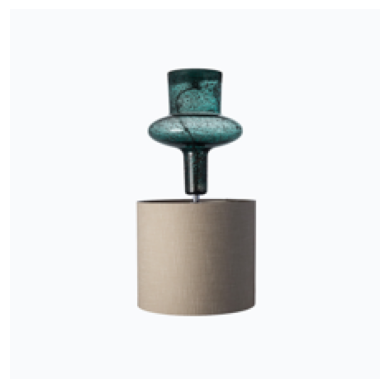

In [ ]:
im_orig = LoadImage('./table_lamp.jpeg')
im = PreprocessImage(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg16_1 = np.argmax(predictions[0])
call_model_args7 = {class_idx_str: prediction_vgg16_1}

prediction_prob_vgg16_1 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg16_1)) 
print("Prediction accuracy: " + str(prediction_prob_vgg16_1)) 

As it can be see the model was fooled and predicted it as 666 so mortar where this is a table lamp (846)

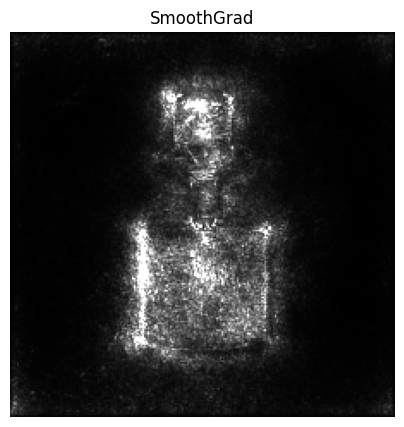

In [ ]:
#Saliency Map
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args7)


smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ROWS = 1
COLS = 1
UPSCALE_FACTOR = 5
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 1))

**2nd Image**

Prediction class: 823
Prediction accuracy: 0.10734042


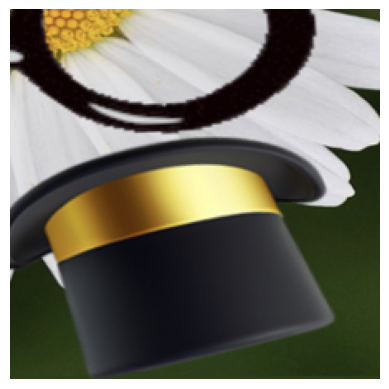

In [ ]:
im_orig = LoadImage('./daisy.jpg')
im = PreprocessImage(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg16_2 = np.argmax(predictions[0])
call_model_args8 = {class_idx_str: prediction_vgg16_2}

prediction_prob_vgg16_2 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg16_2)) 
print("Prediction accuracy: " + str(prediction_prob_vgg16_2)) 

In this case the model thought class daisy is a stethoscope. Hence model was fooled once again.

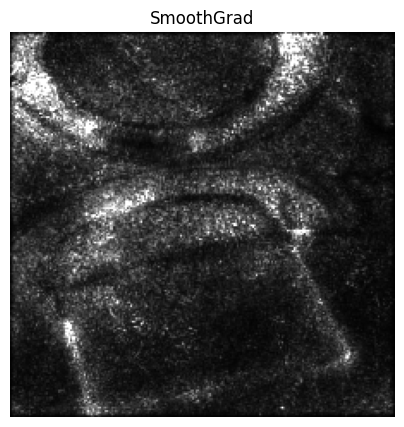

In [ ]:
#Saliency Map
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args8)


smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ROWS = 1
COLS = 1
UPSCALE_FACTOR = 5
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 1))

**3rd Image**

Prediction class: 862
Prediction accuracy: 0.18216792


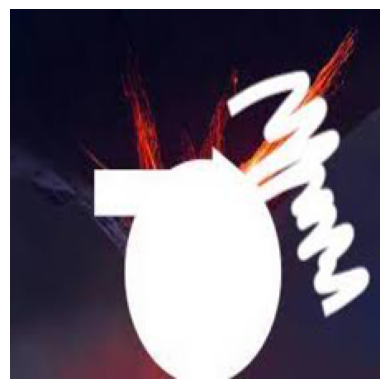

In [ ]:
im_orig = LoadImage('./volcano.jpeg')
im = PreprocessImage(im_orig)

ShowImage(im_orig)

predictions = model(np.array([im]))
prediction_vgg16_3 = np.argmax(predictions[0])
call_model_args9 = {class_idx_str: prediction_vgg16_3}

prediction_prob_vgg16_3 = np.max(predictions[0])

print("Prediction class: " + str(prediction_vgg16_3)) 
print("Prediction accuracy: " + str(prediction_prob_vgg16_3)) 

Class 980 (volcano) was predicted as torch (862) so in this case too I managed to fool VGG16.

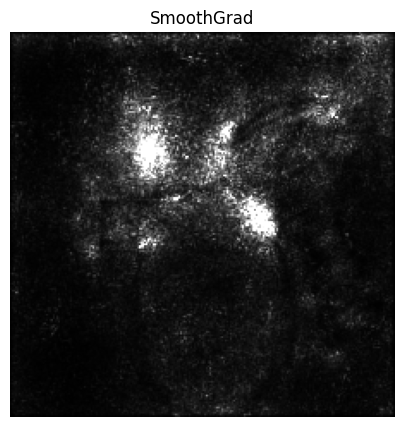

In [ ]:
#Saliency Map
smoothgrad_mask_3d = gradient_saliency.GetSmoothedMask(im, call_model_function, call_model_args9)


smoothgrad_mask_grayscale = saliency.VisualizeImageGrayscale(smoothgrad_mask_3d)

ROWS = 1
COLS = 1
UPSCALE_FACTOR = 5
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

ShowGrayscaleImage(smoothgrad_mask_grayscale, title='SmoothGrad', ax=P.subplot(ROWS, COLS, 1))